# **AML 3104 - Neural Networks and Deep Learning**

# **FINAL PROJECT REPORT**

# **GROUP MEMBERS:**


AJOMON JOSE [C0900975] - Model Development and Training

ANISHA SUSAN MATHEW [C0907393] - 	Model Validation and Performance Evaluation

ASHNA VIJI ALEX [C0901082] - Feature Engineering and Exploratory data analysis

VARUN KASHYAB HARIHARAPUTHRAN [C0891561] - Data Collection and Preprocessing





#1. **INTRODUCTION**

The primary objective of our project is to build a predictive model which is capable of predicting house price in USA. The dataset used for this project, sourced from Kaggle, includes various features related to houses. The goal is to classify predict house price based on different features of a house like square feet, area, number of bedrooms, etc.

Dataset: https://www.kaggle.com/code/burhanykiyakoglu/predicting-house-prices/notebook

# 2. **Data Acquisition**

**Data Loading:**

The original dataset is loaded into the notebook using the Pandas library by 'read.csv' method. The main dataset contains multiple columns, including 'id,' 'date,' 'price,' 'waterfront,' 'zipcode,' etc. Some of the features are not directly relevant to the prediction task and we will be dropping it during preprocessing.


In [1]:
import pandas as pd
original = pd.read_csv('D:\Big_data_analytics\sem_3\Ameer\kc_house_data.csv')
original.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **3. Data Preprocessing**
**3.1 Data Cleaning**

Removal of Irrelevant Columns:

The columns 'id,' 'date,' and 'zipcode' is dropped from the main dataset using the drop() function. These columns are considered as unnecessary for the prediction task which helps to streamline the dataset, focusing only on features that could potentially contribute to predicting price of the house.

Outlier Detection:

The Interquartile Range (IQR) method is used to identify outliers in the 'price' column. The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).
Outliers is identified and then removed from the dataset (train2 = train1[~outliers]) to make sure that the training data is free from extreme values which could negatively impact the model's overall performance.


**3.2 Data Visualization**

Here we have done some visualizations to understand the relationships between the features:

 Scatter plots is used to explore the relationships between the new features and the target variable (price). For instance, a scatter plot of old versus price is created to observe how the age of the property since renovation might affect its price.


  A histogram is plotted to visualize the distribution of the 'bedrooms' feature in the training dataset (train1). This plot helps to understand the frequency distribution of the number of bedrooms in the dataset.


  A box plot is created using Seaborn to identify outliers in the 'price' column. These plots helps to visualize the distribution of data and identifying outliers by highlighting values that lie significantly outside the interquartile range (IQR).

  A heatmap is generated to analyze the correlation between the features. This step helps in identifying multicollinearity among features. Highly correlated features indicate redundancy; thus, some will be dropped or combined.

**3.3 Feature Engineering**

*   Creation of New Features:

  To enhance the model's ability to detect patterns, new features were added to the dataset.

* Living Area to Lot Size Ratios:

  living_lot: Calculated as the ratio of sqft_living to sqft_lot.

  living15_lot15: Calculated as the ratio of sqft_living15 to sqft_lot15.
These features provide insights into the proportion of living space relative to the total lot area, which could be indicative of certain property characteristics.

* Year Renovated Adjustment:

  The feature yr_renovated was adjusted to account for properties that had not been renovated. If yr_renovated was zero, it was replaced with yr_built to ensure that all properties had a renovation year. The new feature old was then calculated as 2016 - yr_renovated, representing the age of the property since its last renovation.

* Condition and Grade Interaction:

  A new feature con_grade was created by normalizing the 'condition' and 'grade' columns and then multiplying them. This interaction term captures a combined effect of the property's condition and grade, providing a more nuanced feature that could influence the target variable.


2. Dropping Less Relevant Features:
After creating new features, some of the original features is dropped. This included columns like sqft_living, sqft_lot, condition, grade, and others, which were either replaced by the new features or deemed less relevant. The list of dropped features included:

  sqft_living

  sqft_lot

  condition

  grade

  yr_built

  yr_renovated

  sqft_living15

  sqft_lot15




In [2]:
drop_col = ['id','date','zipcode']
original.drop(columns = drop_col, axis=1, inplace=True)
original.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [3]:
train = original[:21000]
original_test = original[21001:]
train.count()

price            21000
bedrooms         21000
bathrooms        21000
sqft_living      21000
sqft_lot         21000
floors           21000
waterfront       21000
view             21000
condition        21000
grade            21000
sqft_above       21000
sqft_basement    21000
yr_built         21000
yr_renovated     21000
lat              21000
long             21000
sqft_living15    21000
sqft_lot15       21000
dtype: int64

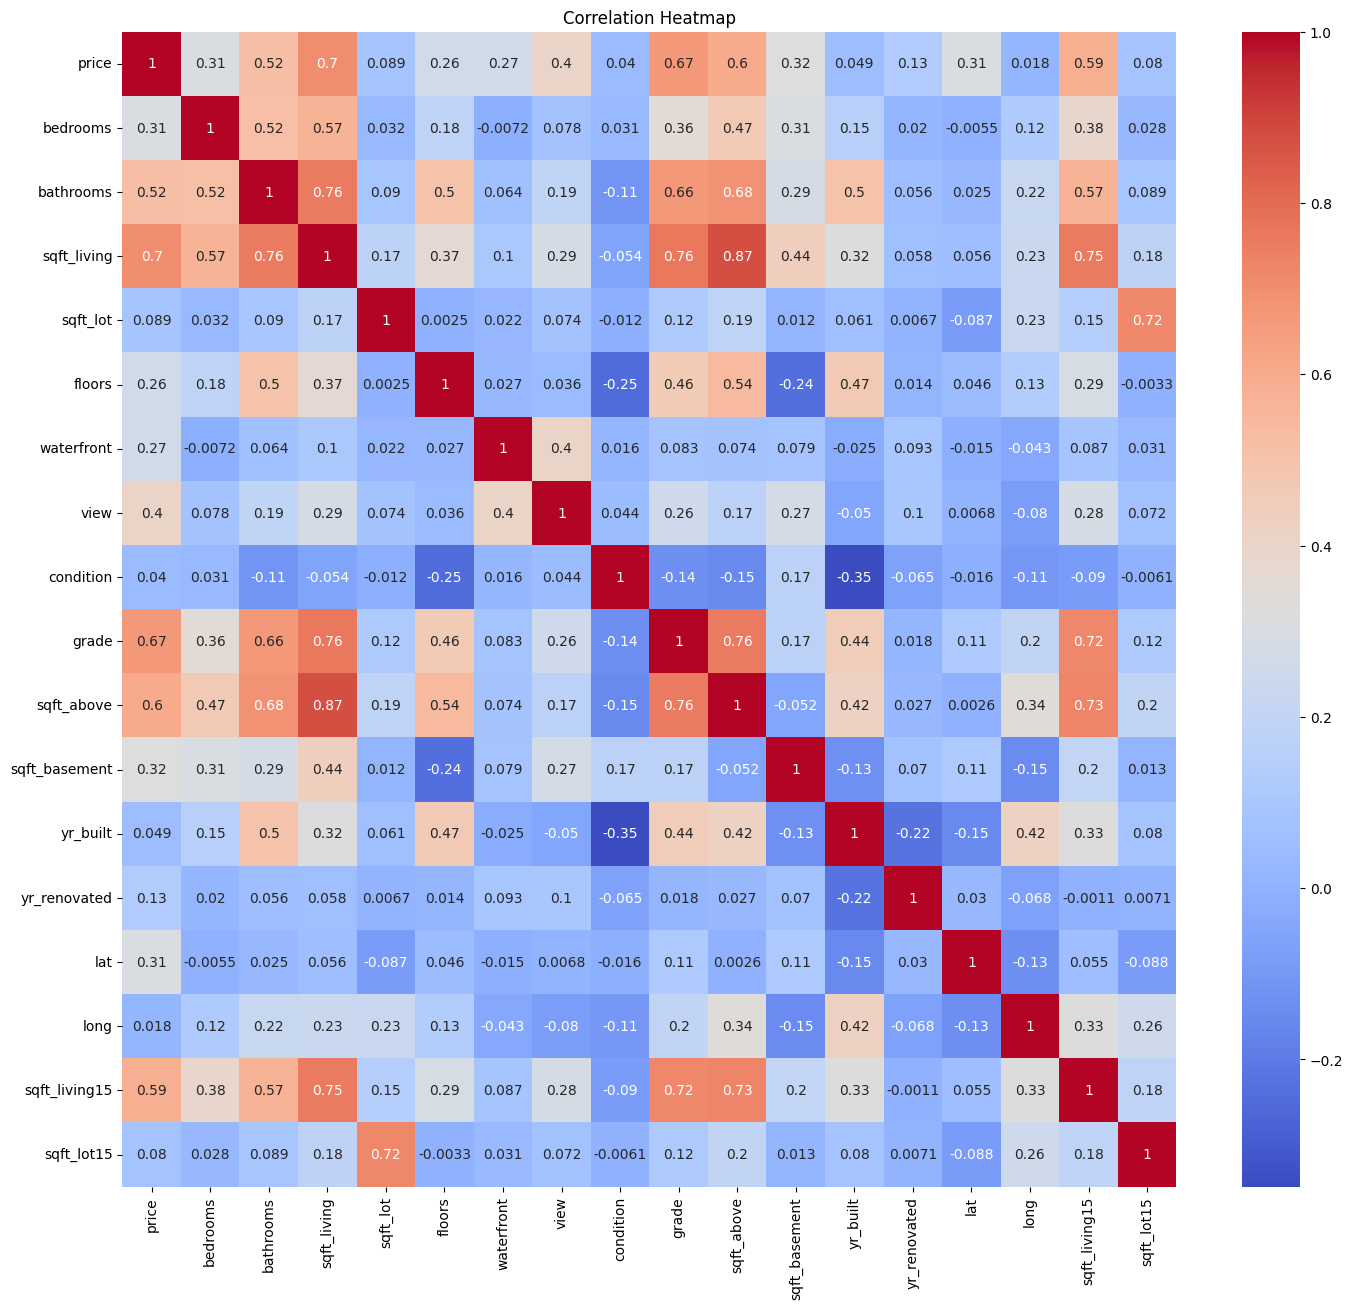

In [4]:
# Plotting a heatmap to identify the correlation between independent variables
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 15))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

In [5]:
# making interactions with different variables, so that the correlation with the dependent variable will improvise.
import numpy as np
train['living_lot'] = train['sqft_living']/train['sqft_lot']
train['living15_lot15'] = train['sqft_living15']/train['sqft_lot15']
train['yr_renovated'] = train.apply(
    lambda row: row['yr_built'] if row['yr_renovated'] < 1 else row['yr_renovated'],
    axis=1
)
train['old'] = 2016 - train['yr_renovated']
train['con_grade'] = ((train['condition']/5) * (train['grade']/13))
#train['basement'] = np.where(train['sqft_basement'] > 0, 1, 0)


C:\Users\ajomo\AppData\Local\Temp\ipykernel_3964\1995919636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['living_lot'] = train['sqft_living']/train['sqft_lot']
C:\Users\ajomo\AppData\Local\Temp\ipykernel_3964\1995919636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['living15_lot15'] = train['sqft_living15']/train['sqft_lot15']
C:\Users\ajomo\AppData\Local\Temp\ipykernel_3964\1995919636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [ ]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,living_lot,living15_lot15,old,con_grade
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,1955.0,47.5112,-122.257,1340,5650,0.208850,0.237168,61.0,0.323077
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991.0,47.7210,-122.319,1690,7639,0.354874,0.221233,25.0,0.323077
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,1933.0,47.7379,-122.233,2720,8062,0.077000,0.337385,83.0,0.276923
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,1965.0,47.5208,-122.393,1360,5000,0.392000,0.272000,51.0,0.538462
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,1987.0,47.6168,-122.045,1800,7503,0.207921,0.239904,29.0,0.369231


In [6]:
# Dropping features from the dataset
dele = ['sqft_living','sqft_lot','condition','grade','yr_built','yr_renovated','sqft_living15','sqft_lot15','sqft_living','sqft_lot']
train1 = train.drop(columns = dele)
train1.head()

,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,sqft_basement,lat,long,living_lot,living15_lot15,old,con_grade
0,221900.0,3,1.00,1.0,0,0,1180,0,47.5112,-122.257,0.208850,0.237168,61.0,0.323077
1,538000.0,3,2.25,2.0,0,0,2170,400,47.7210,-122.319,0.354874,0.221233,25.0,0.323077
2,180000.0,2,1.00,1.0,0,0,770,0,47.7379,-122.233,0.077000,0.337385,83.0,0.276923
3,604000.0,4,3.00,1.0,0,0,1050,910,47.5208,-122.393,0.392000,0.272000,51.0,0.538462
4,510000.0,3,2.00,1.0,0,0,1680,0,47.6168,-122.045,0.207921,0.239904,29.0,0.369231


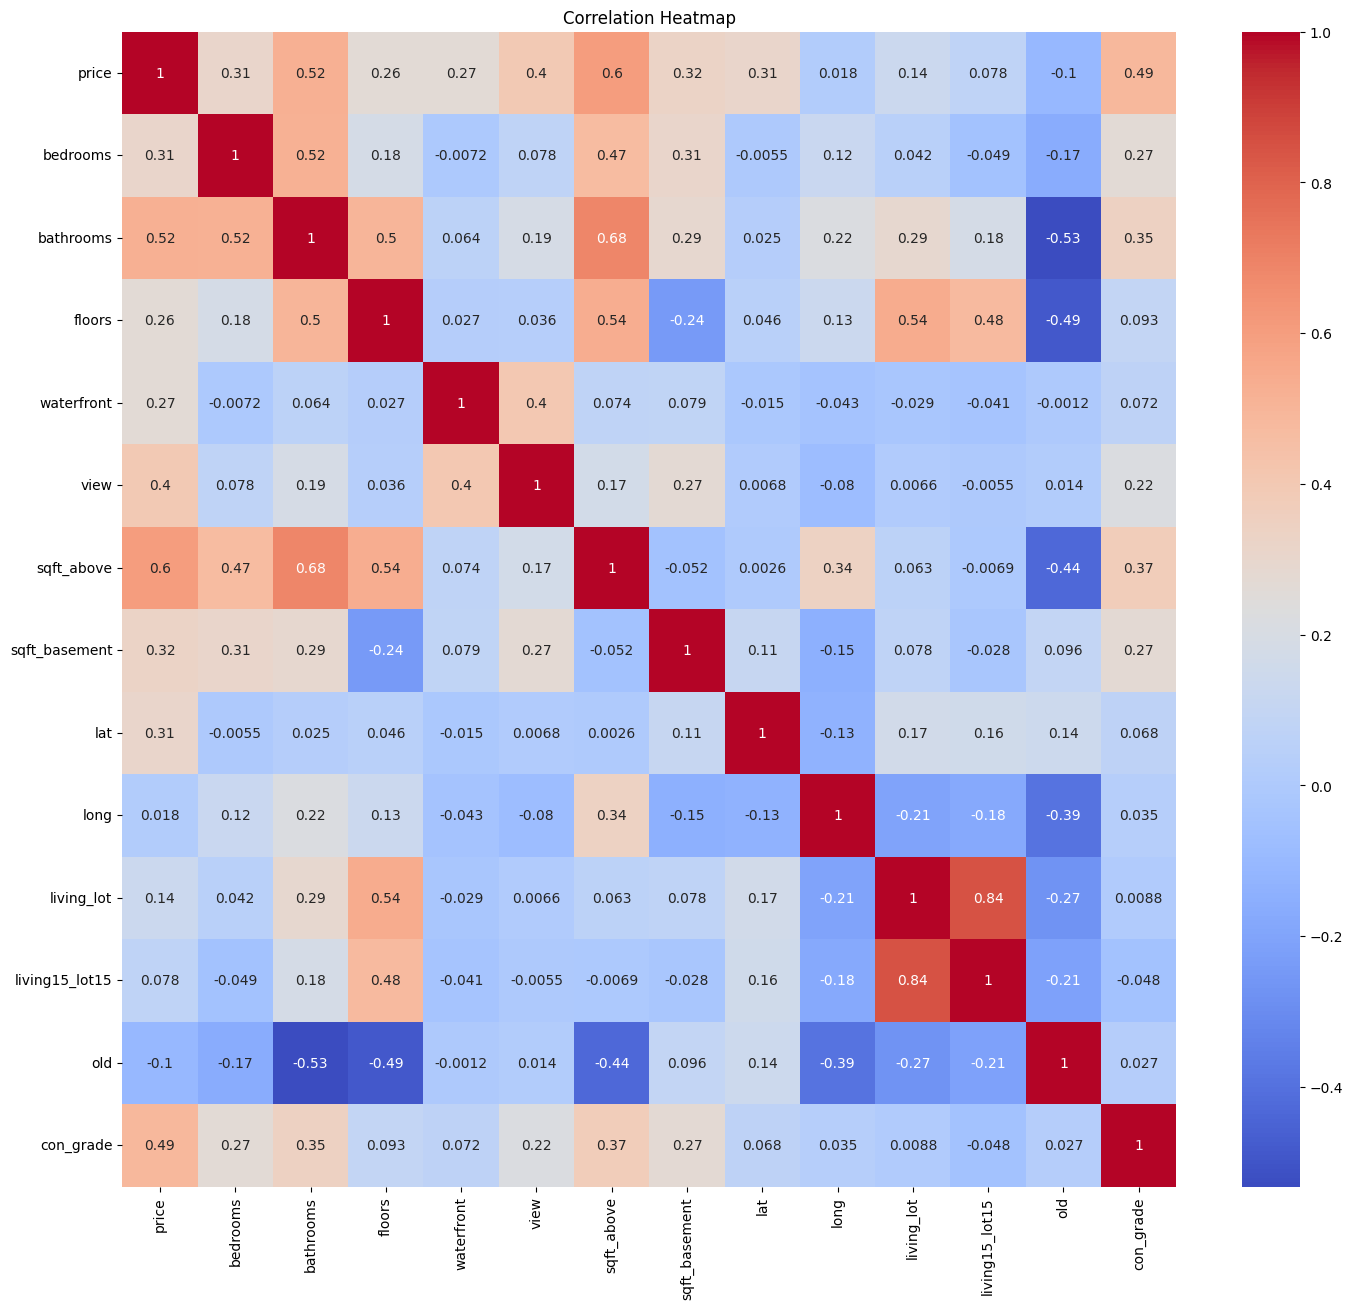

In [7]:
# Plottong a heatmap to identify the correlation between independent variables
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 15))
sns.heatmap(train1.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

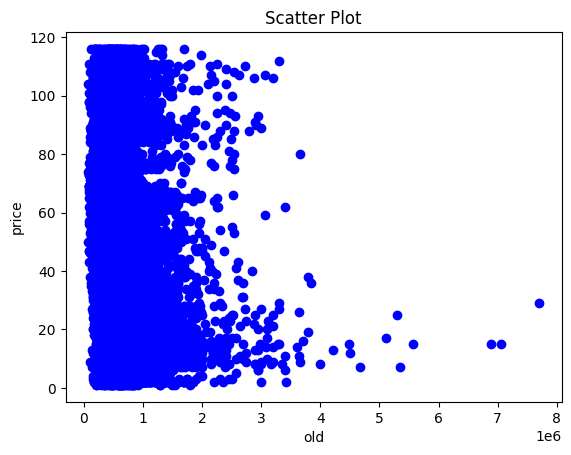

In [ ]:
# Create scatter plot
plt.scatter(train1['price'],train1['old'],  color='blue', marker='o')

# Add title and labels
plt.title('Scatter Plot')
plt.xlabel('old')
plt.ylabel('price')

# Show plot
plt.show()

In [8]:
data = train1['bedrooms']
data_series = pd.Series(data)

# Create the frequency table
frequency_table = data_series.value_counts()

# Convert the frequency table to a DataFrame for better display
frequency_table_df = frequency_table.reset_index()
frequency_table_df.columns = ['Item', 'Frequency']
print(frequency_table_df)

    Item  Frequency
0      3       9570
1      4       6673
2      2       2693
3      5       1530
4      6        268
5      1        191
6      7         38
7      0         13
8      8         13
9      9          6
10    10          3
11    11          1
12    33          1


In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = train1['bedrooms']
values = [23, 17, 35, 29]

# Create the bar graph
plt.bar(categories, values, color='blue')

# Add title and labels
plt.title('Sample Bar Graph')
plt.xlabel('Categories')
plt.ylabel('Values')

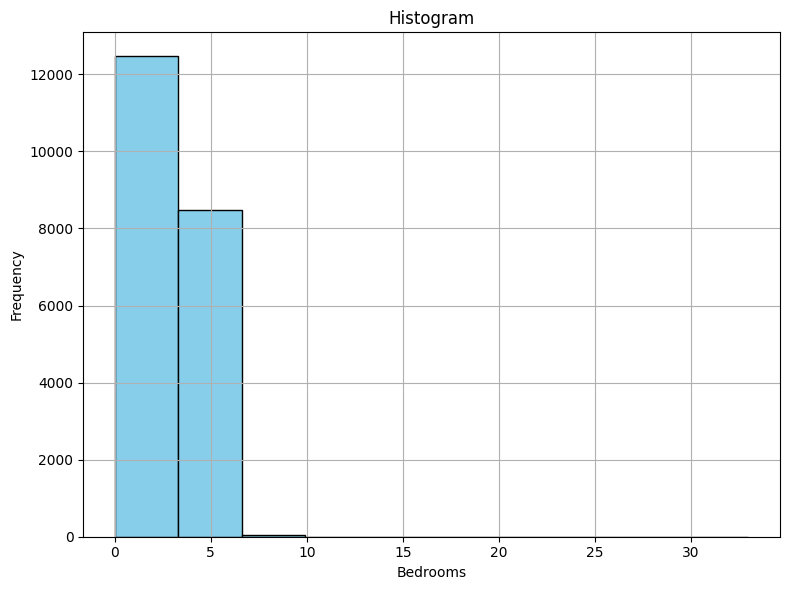

In [ ]:
# Create histogram
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(train1['bedrooms'], bins=10, edgecolor='black', color='skyblue')  # Adjust bins for better resolution

# Customize labels and title
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.grid(True)  # Optional: Add grid lines for better readability
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of labels
plt.show()

<Axes: ylabel='price'>

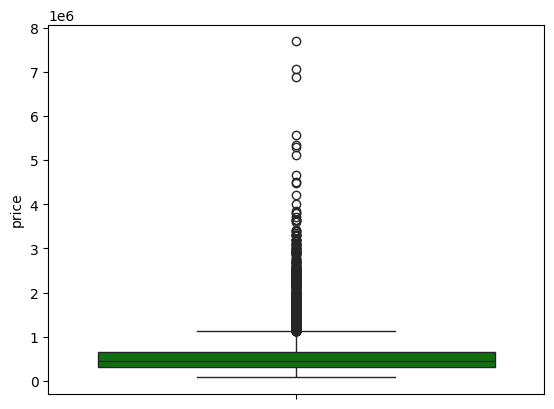

In [10]:
#plotting box plot to identify outliers.
import seaborn as sns
sns.boxplot(train1['price'],color='green')

In [18]:
def detect_outliers_iqr(train1):
    outlier_mask = pd.DataFrame(False, index=train1.index, columns=train1.columns)
    
    for col in train1.columns:
        Q1 = train1[col].quantile(0.25)
        Q3 = train1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mask = (train1[col] < lower_bound) | (train1[col] > upper_bound)
        outlier_mask[col] = mask
    
    return outlier_mask

# Detect outliers
outliers = detect_outliers_iqr(train1)

# Display the boolean mask for outliers
print("Outlier mask:")
print(outliers)

# Filter out the outliers
train2 = train1[~outliers.any(axis=1)]

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(train2)

Outlier mask:
       price  bedrooms  bathrooms  floors  waterfront   view  sqft_above  \
0      False     False      False   False       False  False       False   
1      False     False      False   False       False  False       False   
2      False     False      False   False       False  False       False   
3      False     False      False   False       False  False       False   
4      False     False      False   False       False  False       False   
...      ...       ...        ...     ...         ...    ...         ...   
20995  False     False      False   False       False  False       False   
20996   True     False      False   False       False   True       False   
20997  False     False      False   False       False  False       False   
20998  False     False      False   False       False  False       False   
20999  False     False      False   False       False  False       False   

       sqft_basement    lat   long  living_lot  living15_lot15    old  \


In [19]:
data = train2['bedrooms']
data_series = pd.Series(data)

# Create the frequency table
frequency_table = data_series.value_counts()

# Convert the frequency table to a DataFrame for better display
frequency_table_df = frequency_table.reset_index()
frequency_table_df.columns = ['Item', 'Frequency']
print(frequency_table_df)

   Item  Frequency
0     3       7585
1     4       4947
2     2       2022
3     5        927


In [20]:
train2.corr()

,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,sqft_basement,lat,long,living_lot,living15_lot15,old,con_grade
price,1.000000,0.263693,0.406610,0.316046,NaN,NaN,0.497481,0.155307,0.488167,0.130243,0.303577,0.262682,-0.108946,0.363864
bedrooms,0.263693,1.000000,0.509597,0.297731,NaN,NaN,0.461068,0.236620,-0.035215,0.159536,0.235659,0.103764,-0.266989,0.203353
bathrooms,0.406610,0.509597,1.000000,0.549430,NaN,NaN,0.655034,0.169646,-0.043126,0.348789,0.376401,0.261025,-0.610166,0.241123
floors,0.316046,0.297731,0.549430,1.000000,NaN,NaN,0.705006,-0.327900,-0.051681,0.300303,0.432980,0.385566,-0.479862,0.072202
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_above,0.497481,0.461068,0.655034,0.705006,NaN,NaN,1.000000,-0.256006,-0.038351,0.427612,0.297318,0.222116,-0.560590,0.244863
sqft_basement,0.155307,0.236620,0.169646,-0.327900,NaN,NaN,-0.256006,1.000000,0.121613,-0.171916,0.121113,-0.038910,0.143353,0.147124
lat,0.488167,-0.035215,-0.043126,-0.051681,NaN,NaN,-0.038351,0.121613,1.000000,-0.093402,0.090043,0.085245,0.199708,0.039960
long,0.130243,0.159536,0.348789,0.300303,NaN,NaN,0.427612,-0.171916,-0.093402,1.000000,-0.063467,-0.019688,-0.506060,0.082517


In [21]:
train2.isnull().sum()

price             0
bedrooms          0
bathrooms         0
floors            0
waterfront        0
view              0
sqft_above        0
sqft_basement     0
lat               0
long              0
living_lot        0
living15_lot15    0
old               0
con_grade         0
dtype: int64

In [22]:
wq = ['waterfront','view']
train2.drop(columns = wq)
train2.head()

,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,sqft_basement,lat,long,living_lot,living15_lot15,old,con_grade
0,221900.0,3,1.00,1.0,0,0,1180,0,47.5112,-122.257,0.208850,0.237168,61.0,0.323077
1,538000.0,3,2.25,2.0,0,0,2170,400,47.7210,-122.319,0.354874,0.221233,25.0,0.323077
2,180000.0,2,1.00,1.0,0,0,770,0,47.7379,-122.233,0.077000,0.337385,83.0,0.276923
3,604000.0,4,3.00,1.0,0,0,1050,910,47.5208,-122.393,0.392000,0.272000,51.0,0.538462
4,510000.0,3,2.00,1.0,0,0,1680,0,47.6168,-122.045,0.207921,0.239904,29.0,0.369231


# **4. Model Deployment**

**4.1 Data Splitting**

In this section, we focuses on preparing the dataset for the training and evaluation phases of our machine learning model. The dataset, referred to as train2, is first processed to separate the input features from the target variable. The input features consist of all columns except the 'price' column, which we aim to predict. These features are stored in the variable x, while the 'price' column itself is stored in y.

To effectively train and evaluate the model, we split the dataset into two subsets: training and testing sets. This is accomplished using the train_test_split function from the sklearn.model_selection module. The data is split such that 80% of the data is used for training (X_train and y_train) and the remaining 20% is reserved for testing (X_test and y_test). The training set is used to fit the model, allowing it to learn the relationships between the features and the target variable. The testing set, on the other hand, is used to evaluate the model's performance on unseen data.

The split is controlled by the random_state=42 parameter, which ensures that the same split occurs every time the code is run. This is important for reproducibility, allowing us to consistently compare results across different models and experiments.


In [23]:
#modeling
from sklearn.model_selection import train_test_split
x = train2.drop('price', axis=1)
y = train2['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**4.2 Standardization**

To standardize the data, we are using the StandardScaler from the sklearn.preprocessing module.

Fitting and Transforming the Training Data:

Using the fit_transform method, we calculated the mean and standard deviation for each feature in the training dataset (X_train). The scaler then transformed the data to ensure each feature had a mean of 0 and a standard deviation of 1. This transformation standardizes the training data, making sure that features with larger initial ranges do not dominate the model's learning process.

Transforming the Testing Data:

We applied the transform method to the testing data (X_test). It's important to note that the testing data is transformed using the scaling parameters (mean and standard deviation) derived from the training data. This maintains consistency and ensures that the model is evaluated on a comparable scale, without being influenced by the testing data during the training phase.

Converting Scaled Data into DataFrames:

The scaled data was initially in array format. To maintain ease of use and consistency with our workflow, we converted these arrays back into DataFrames. This conversion also helps preserve the original column names, making the data easier to handle and reference in subsequent modeling steps.

In [26]:
# standardising the values to equal scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_tr_scaled=scaler.fit_transform(X_train)

X_te_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_te_scaled, columns=X_test.columns)



In [27]:
X_train_scaled.head()

,bedrooms,bathrooms,floors,waterfront,view,sqft_above,sqft_basement,lat,long,living_lot,living15_lot15,old,con_grade
0,-0.400161,-0.686170,1.306778,0.0,0.0,-0.133685,-0.628067,-0.071389,-0.498657,-0.741543,-0.504249,2.267487,-0.864811
1,-0.400161,-0.686170,-0.824686,0.0,0.0,-0.269847,0.469065,1.519956,-0.460024,-0.005254,-0.334983,0.082122,-0.231381
2,-1.698117,0.076419,-0.824686,0.0,0.0,-1.041431,-0.628067,1.166777,0.389918,-0.410894,0.422806,-0.464219,-0.864811
3,2.195751,0.839007,1.306778,0.0,0.0,2.932982,-0.628067,-1.700089,-0.552745,3.165322,2.159049,-1.301943,-0.864811
4,0.897795,0.839007,0.241046,0.0,0.0,0.108380,0.194782,0.847557,-0.776820,1.639449,1.796006,1.793991,1.457766


In [28]:
X_test_scaled.head()

,bedrooms,bathrooms,floors,waterfront,view,sqft_above,sqft_basement,lat,long,living_lot,living15_lot15,old,con_grade
0,-0.400161,0.839007,2.372510,0.0,0.0,2.816488,-0.628067,-1.914034,1.193499,-1.621129,-1.854947,-1.229097,0.402049
1,-0.400161,-1.448758,-0.824686,0.0,0.0,-0.390880,-0.628067,-0.328123,0.505819,-0.670569,-0.634983,0.409926,2.091196
2,0.897795,-0.304875,-0.824686,0.0,0.0,0.728673,-0.628067,-1.305479,2.228882,-1.430193,-1.828615,0.409926,2.091196
3,-0.400161,-1.448758,0.241046,0.0,0.0,-1.026302,-0.628067,0.107239,-0.490931,-0.342222,0.220998,1.611877,-0.864811
4,-1.698117,-1.448758,-0.824686,0.0,0.0,-1.086818,-0.628067,-0.298918,-1.186337,-0.963969,-0.771022,0.846999,-2.131672


**4.3 Modeling Using Linear Regression and Decision Tree**

In this part of the project, we are implementing and evaluating two machine learning models: Linear Regression and Decision Tree Regressor. These models are used to predict the target variable, price, based on the features in the dataset.

Linear Regression (LinearRegression): This model assumes a linear relationship between the input features and the target variable.

Decision Tree Regressor (DecisionTreeRegressor): This model splits the data into branches based on feature values, creating a tree structure that can capture non-linear relationships in the data.


**Cross-Validation Setup**

To evaluate the models reliably, we are using K-Fold Cross Validation. In each iteration, the model is trained on k-1 folds and tested on the remaining fold. This process helped to assess the machine learning model's performance across various subsets of the dataset and provides a better estimate of its generalization ability. We set n_splits=5 to divide the data into five folds, and the evaluation metric used here is the root mean squared error (RMSE), a common metric for regression tasks.


**Model Evaluation and Prediction**

The evaluate_model function is defined to perform the following tasks:

Cross-Validation: This function calculates the cross-validation scores using the negative mean squared error (MSE) and converts them to RMSE for better interpretability. The cross_val_score function does this for each fold, providing a range of RMSE values that reflect the model's performance variability.

Model Training: After cross-validation, the model is trained on the entire training set.

Prediction: The trained model is then used to make predictions on the test set.

The function returns the predicted values and prints the RMSE scores from cross validation.

In [29]:
#Modeling using linear regression and Decision tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
# Initialize the models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
mlp_reg = MLPRegressor(max_iter=1000, random_state=42)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate a model using K-Fold CV and make predictions
def evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test):
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse = [(-score) ** 0.5 for score in cv_scores]
    print(f"{model.__class__.__name__} CV RMSE:", cv_rmse)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return y_pred

# Evaluate models and get predictions
lin_reg_pred = evaluate_model(lin_reg, X_train_scaled, y_train, X_test_scaled, y_test)
tree_reg_pred = evaluate_model(tree_reg, X_train_scaled, y_train, X_test_scaled, y_test)
#mlp_reg_pred = evaluate_model(mlp_reg, X_train_scaled_df, y_train, X_test_scaled_df, y_test)

# Display the predicted values
predicted_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': lin_reg_pred,
    'Decision Tree': tree_reg_pred,
    #'MLP Regressor': mlp_reg_pred
})
print(predicted_df)

LinearRegression CV RMSE: [120401.96456486163, 115387.73803984754, 113816.69197213936, 118087.0678649692, 120223.58169826161]
DecisionTreeRegressor CV RMSE: [103619.31351480461, 104158.17086852004, 100713.10012555106, 103799.96217653221, 108067.89343514238]
         Actual  Linear Regression  Decision Tree
4081   905000.0      521658.979393       820000.0
19873  320000.0      405010.611382       359250.0
17920  360000.0      408922.778365       428000.0
7229   425000.0      328032.925008       332000.0
6557   121800.0      215738.924557       234000.0
...         ...                ...            ...
5287   322200.0      389665.984690       342000.0
429    365000.0      444055.074773       346000.0
11001  280000.0      305058.295186       303000.0
7161   660000.0      731940.091461       775000.0
8579   437850.0      582647.798443       655275.0

[3097 rows x 3 columns]


**4.4 Hyperparameter Tuning for Linear Regression Using Ridge Regression**

In this part of the project, we are aiming to enhance the performance of our Linear Regression model by using Ridge Regression and tuning its hyperparameters. Ridge Regression, also known as L2 regularization, helps to prevent overfittingthe model by just adding a penalty to the model for large coefficients, by maintaining model simplicity and improving generalization to unseen data.

We defined a grid of possible values for the `alpha` parameter, which controls the strength of the regularization. The `alpha` values tested ranged from 0.1 to 1000. This selection was crucial as a smaller `alpha` allows the model to fit the data more closely, while a larger `alpha` increases regularization, potentially improving generalization by preventing overfitting. We used GridSearchCV, a powerful tool for hyperparameter optimization that systematically searches through the specified grid, applying K-Fold cross-validation to ensure a comprehensive evaluation of each model configuration. The cross-validation was set to 5 folds, balancing the need for a robust validation with computational efficiency.

After fitting the GridSearchCV to our scaled training data, we identified the optimal `alpha` value that minimized the cross-validation mean squared error. This optimal configuration was then used to make predictions on the test set. The model's performance was evaluated using key metrics such as Root Mean Squared Error (RMSE), R² (coefficient of determination), and Mean Squared Error (MSE). These metrics provided insights into how well the model captured the underlying data patterns and its predictive accuracy on new data.

 By employing regularization through Ridge Regression, we were able to achieve a more balanced model that avoided overfitting while still capturing the essential relationships in the data.

In [30]:
# Hypertuning for linear regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.metrics import r2_score

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
}

# Initialize the Ridge regression model
ridge_reg = Ridge()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", -grid_search.best_score_)

# Use the best estimator to predict on the test set
best_ridge_reg = grid_search.best_estimator_
y_pred_lin = best_ridge_reg.predict(X_test_scaled)

# Evaluate the model
test_rmse = mean_squared_error(y_test, y_pred_lin, squared=False)
print(f"Test RMSE: {test_rmse}")

# Display the predicted values
predicted_gr_li = pd.DataFrame({
    'Actual': y_test,
    'Ridge Regression': y_pred_lin
})
print(predicted_gr_li)

r2_gr_li = r2_score(y_test, y_pred_lin)
print("R2: ",r2_gr_li)

mse_gr_lin = mean_squared_error(y_test, y_pred_lin)
print("MSE: ",mse_gr_lin)

Best Hyperparameters: {'alpha': 10.0}
Best CV Score: 13832603425.10384
Test RMSE: 114281.78069761755
         Actual  Ridge Regression
4081   905000.0     521225.453142
19873  320000.0     405067.693618
17920  360000.0     408983.664987
7229   425000.0     328113.102130
6557   121800.0     215720.104992
...         ...               ...
5287   322200.0     389893.681241
429    365000.0     444174.574012
11001  280000.0     305329.463110
7161   660000.0     731922.710722
8579   437850.0     582391.404331

[3097 rows x 2 columns]
R2:  0.6303160046655949
MSE:  13060325399.41835


In [31]:
mse_lin = mean_squared_error(y_test, lin_reg_pred)
mse_D_tr = mean_squared_error(y_test, tree_reg_pred)
print(mse_lin)
print(mse_D_tr)

13060843611.470484
10725632800.449709


In [32]:
#Hyper parameter tuning using Gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
# Define the model
tree_reg = DecisionTreeRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on test data
y_pred_grid = best_model.predict(X_test_scaled)

# Calculate R2 score
r2_1 = r2_score(y_test, y_pred_grid)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [33]:
predicted1 = pd.DataFrame({
    'Actual': y_test,
    'Decision Tree': y_pred_grid,
    })
print(predicted1)

         Actual  Decision Tree
4081   905000.0  736025.000000
19873  320000.0  276767.935185
17920  360000.0  502150.000000
7229   425000.0  406874.528302
6557   121800.0  183561.515152
...         ...            ...
5287   322200.0  311187.014085
429    365000.0  366929.705882
11001  280000.0  314087.087302
7161   660000.0  790650.000000
8579   437850.0  598969.800000

[3097 rows x 2 columns]


In [34]:
mse_d_tr_grid = mean_squared_error(y_test, y_pred_grid)
print(mse_d_tr_grid)

7053869064.883893


In [35]:
# Calculate R2 score
r2_1 = r2_score(y_test, y_pred_grid)
print(r2_1)

0.8003340331330353


In [36]:
#Adj R2
n = X_test_scaled.shape[0]  # number of observations
p = X_test_scaled.shape[1]  # number of predictors
adj_r2_1 = 1 - (1 - r2_1) * (n - 1) / (n - p - 1)
print(adj_r2_1)


0.7994921072266874


**4.5 Hyperparameter Tuning Using RandomizedSearchCV for Decision Tree Regressor**

In this part of the project, we focused on enhancing the Decision Tree Regressor's performance through hyperparameter tuning, using RandomizedSearchCV. This approach helps as there is a large number of hyperparameters, as it randomly samples a specified number of parameter combinations instead of exhaustively searching through all possible combinations, which is the case with GridSearchCV.

We started by defining a distribution of possible values for several key hyperparameters of the Decision Tree Regressor. The max_depth parameter, which controls the maximum depth of the tree, was varied from no restriction to specific depths ranging from 10 to 50 in increments of 10. This range allowed us to explore how deeper or shallower trees affected model performance. For the min_samples_split and min_samples_leaf parameters, which determine the minimum number of samples required to split an internal node and to be at a leaf node, respectively, we used a random integer distribution (randint) to sample values between 2 and 20 for splits and 1 and 20 for leaf nodes. This approach ensured that we considered both simpler trees with fewer splits and more complex trees. Additionally, the max_features parameter, which specifies the number of features to consider when looking for the best split.

The RandomizedSearchCV configured sample with 100 different combinations of these hyperparameters (n_iter=100), providing a broad yet manageable exploration of the parameter space. We employed 5-fold cross-validation (cv=5) to robustly evaluate the model's performance across different subsets of the training data, helping to avoid overfitting. By setting n_jobs=-1, we enabled parallel computation, speeding up the search process, and random_state=42 ensured that our results were reproducible.

After fitting the RandomizedSearchCV to the scaled training data, we identified the best hyperparameter settings that minimized the cross-validation error. These settings were then used to train a final model, which we evaluated on the test set. The model's predictions were compared to the actual values, and we calculated the R² score to assess the proportion of variance in the dependent variable that was predictable from the independent variables. This score provided a clear indication of the model's predictive power.

In conclusion, the use of RandomizedSearchCV allowed us to efficiently navigate the hyperparameter space of the Decision Tree Regressor, leading to a model that was well-tuned and demonstrated strong performance on the test data.

In [37]:
#  RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'max_depth': [None] + list(range(10, 51, 10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [None, 'sqrt', 'log2']
}

# Perform Random Search
random_search = RandomizedSearchCV(estimator=tree_reg, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Predict on test data
y_pred_random = best_model_random.predict(X_test_scaled)
predicted2 = pd.DataFrame({
    'Actual': y_test,
    'Decision Tree': y_pred_random,
    })
print(predicted2)

# Calculate R2 score
r2_random = r2_score(y_test, y_pred_random)
print(r2_random)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
         Actual  Decision Tree
4081   905000.0  673473.133333
19873  320000.0  278513.888889
17920  360000.0  448664.814815
7229   425000.0  454128.947368
6557   121800.0  144590.789474
...         ...            ...
5287   322200.0  337427.777778
429    365000.0  348217.166667
11001  280000.0  297571.052632
7161   660000.0  817446.678571
8579   437850.0  669690.787879

[3097 rows x 2 columns]
0.797374231525278


In [38]:
mse_d_tr_random = mean_squared_error(y_test, y_pred_random)
print(mse_d_tr_random)

7158433970.594958


**4.6 Adjusted R² Calculation**

To evaluate our model more accurately, we calculated the Adjusted R², which adjusts the R² score for the number of predictors used in the model. While R² measures how well the model explains the variability of the data, Adjusted R² also considers the number of predictors. This method is important because adding more predictors can artificially increase R² score, even if they don't actually improve the model's predictive power. The Adjusted R² gives a better indication of how well the model performs.

We used the R² score obtained from the Decision Tree Regressor after hyperparameter tuning (r2_random). We then calculated the Adjusted R² using the number of observations in our test data and the number of predictors.

In [39]:
#Adj R2
n = X_test_scaled.shape[0]  # number of observations
p = X_test_scaled.shape[1]  # number of predictors
adj_r2_2 = 1 - (1 - r2_random) * (n - 1) / (n - p - 1)
print(adj_r2_2)

0.79651982510615


**4.7 Modeling Using Random Forest Regressor**

In this part of the project, we deployed a Random Forest Regressor, which is a robust machine learning model known for its effectiveness in handling complex datasets with numerous features. We initialized the Random Forest model with a random state of 42 to ensure consistent results across different runs, which is crucial for reproducibility and comparability of the findings.

To evaluate the model's performance, we conducted 5-fold cross-validation using the R² metric. This technique involves dividing the dataset into five parts, training the model on four parts, and validating it on the fifth. This process is repeated five times, each time with a different validation set, providing a comprehensive assessment of the model's ability to generalize to unseen data. The cross-validated R² scores indicated the proportion of variance in the target variable that the model could explain. By averaging these scores, we obtained a mean cross-validated R², offering a reliable measure of the model's predictive power and consistency.

Finally, we refitted the Random Forest model on the entire training dataset to utilize all available data, enhancing the model's ability to make accurate predictions on new data. The Random Forest Regressor was particularly well-suited for this task due to its ability to capture non-linear relationships and interactions between features. This learning approach not only improved the model's predictive accuracy but also provided insights into feature importance, which helped us understand the key features of the target variable in our dataset.



In [40]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Define the Random Forest model
rf_reg = RandomForestRegressor(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_reg, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validated R2 scores: ", cv_scores)
print("Mean cross-validated R2 score: ", cv_scores.mean())

# Refit the model on the entire training dataset
rf_reg.fit(X_train_scaled, y_train)


Cross-validated R2 scores:  [0.84301536 0.84112348 0.8483632  0.84444288 0.84273448]
Mean cross-validated R2 score:  0.843935879024176


RandomForestRegressor(random_state=42)

In [41]:
y_pred_rf = rf_reg.fit(X_train_scaled, y_train).predict(X_test_scaled)
predicted_rf = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': y_pred_rf,
    })
print(predicted_rf)

         Actual  Random Forest
4081   905000.0  649253.000000
19873  320000.0  296847.666667
17920  360000.0  420415.640000
7229   425000.0  391666.500000
6557   121800.0  181286.000000
...         ...            ...
5287   322200.0  318696.540000
429    365000.0  369136.990000
11001  280000.0  303024.510000
7161   660000.0  705126.766667
8579   437850.0  723982.820000

[3097 rows x 2 columns]


In [42]:
# R2
r2_rf = r2_score(y_test, y_pred_rf)
print(r2_rf)
# MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(mse_rf)
#Adj R2
n = X_test_scaled.shape[0]  # number of observations
p = X_test_scaled.shape[1]  # number of predictors
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)
print(adj_r2_rf)




0.8492588172528356
5325437191.270075
0.8486231911173464


**Feature Importance Analysis Using Random Forest Regressor**


Feature importance analysis helped us to understand which features are most influential in predicting the target variable. In this project, we used a Random Forest Regressor to assess the importance of each feature in our dataset. Random Forest is an machine learning model which aggregates the results of multiple decision trees to provide more robust predictions. This model also naturally provides a way to measure feature importance by calculating the contribution of each feature to the reduction in prediction error across all trees.

To examine the feature importances, we first extracted the importance scores using the feature_importances_ attribute of the trained Random Forest model. These scores indicate the relative importance of each feature, with higher scores meaning greater importance.

Next, we organized the feature names and their corresponding importance scores into a DataFrame for better visualization. This step was particularly useful for identifying which features were most critical to the model's predictions. We sorted the DataFrame by the importance scores in descending order to highlight the most important features at the top.

For visual representation, we plotted a horizontal bar chart, with the features on the y-axis and their importance scores on the x-axis. This chart provided an intuitive way to compare the importance of different features. The plot was inverted on the y-axis to display the most important features at the top, making it easier to identify the main predictors in our model.

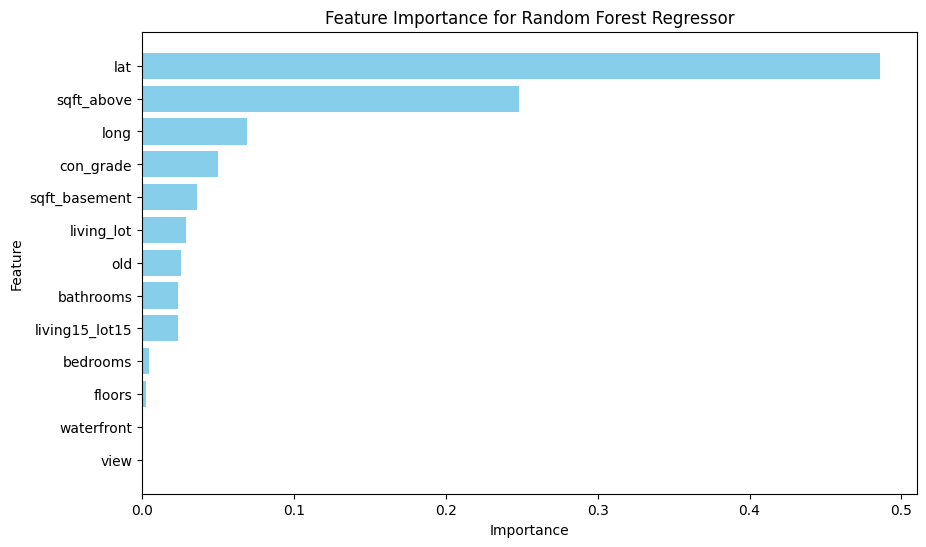

,Feature,Importance
7,lat,0.485906
5,sqft_above,0.248481
8,long,0.068934
12,con_grade,0.050281
6,sqft_basement,0.036103


In [43]:
# Examine feature importance
# Get feature importances
importances = rf_reg.feature_importances_

# Create a DataFrame for better visualization
features = X_train_scaled.columns if isinstance(X_train_scaled, pd.DataFrame) else np.arange(X_train_scaled.shape[1])
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()

importance_df.head()

# **5. Pickle Files**

To ensure resuability and deployment of the best modek, we saved the trained Random Forest Regressor model using the `pickle` library. This process involved serializing the model into a file (`rf_reg.pkl`), preserving the model's parameters and structure. By saving the model, we avoided the need for retraining, saving computational resources and time. We also loaded the model from the file, allowing us to restore the model for predictions or future analysis. This helped us to make the model as easily shareable and deployable, supporting reproducibility and practical application.

In [44]:
import pickle
# Save the trained model to a file
with open('rf_reg.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)

# Load the trained model from the file
with open('rf_reg.pkl', 'rb') as file:
    loaded_model5 = pickle.load(file)

# **6. Model Deployment**

The model, saved as rf_reg.pkl, is loaded using Python's pickle library. This is used by the application to get the model's trained parameters which makes predictions. The get_predicted_price function is responsible for taking the user's input data, converting it into the required format, and then predicting the house price. The predicted price is rounded to two decimal places for easy reading.

Here, we had used Streamlit app which is a user-friendly interface where users/end-users can enter details about a house, such as the number of bedrooms, bathrooms, and other features. After entering the information, they can click a "Predict" button, and the app will display the estimated price of the house. This interactive feature will allow users to get instant feedback on how different features might affect the house's value.

In [ ]:
import numpy as np
import pandas as pd
import pickle
import streamlit as st
import os
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Load the model
file_path = r'D:\Big_data_analytics\sem_3\Ameer\rf_reg.pkl'

if not os.path.exists(file_path):
    st.error(f"File not found: {file_path}")
else:
    with open(file_path, 'rb') as f:
        model = pickle.load(f)

# Function to get predicted price
def get_predicted_price(input_data):
    features = np.array([input_data])
    prediction = model.predict(features)[0]
    return round(prediction, 2)

# Streamlit app
def main():
    st.title("House Price Predictor")
    html_temp = """
    <div>
    <h2>House Price Prediction ML App</h2>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    # Input fields
    bedrooms = st.number_input("Bedrooms", min_value=0, max_value=10, value=3)
    bathrooms = st.number_input("Bathrooms", min_value=0.0,value=5.0)
    floors = st.number_input("Floors", min_value=0, max_value=5, value=1)
    waterfront = st.selectbox("Waterfront", [0, 1])
    view = st.number_input("View", min_value=0, max_value=4, value=0)
    sqft_above = st.number_input("Square Feet Above", min_value=0, value=1500)
    sqft_basement = st.number_input("Square Feet Basement", min_value=0, value=0)
    lat = st.number_input("Latitude", min_value=0.0, value=90.0)
    long = st.number_input("Longitude", min_value=0.0, value=180.0)
    living_lot = st.number_input("Living Lot", min_value=0.0, value=1.0)
    living15_lot15 = st.number_input("Living15 Lot15", min_value=0.0, value=1.0)
    old = st.number_input("Old (Years Since Built)", min_value=0, value=100)
    con_grade = st.number_input("Condition/Grade", min_value=0.0, value=10.0)



    if st.button("Predict"):
        input_data = [
            bedrooms, bathrooms, floors, waterfront, view,
            sqft_above, sqft_basement, lat, long, living_lot,
            living15_lot15, old, con_grade
        ]
        input_data = pd.DataFrame(input_data)
        input_data_r=scaler.fit_transform(input_data)
        print(input_data_r)
        print(input_data)
        print(np.array(input_data_r).ravel())
        result = get_predicted_price(np.array(input_data_r).ravel())
        st.success(f"Predicted Price: {result} USD")

if __name__ == "__main__":
    main()


# **7. Conclusion**



In this project, we successfully developed and deployed a machine learning model predicting house prices using the Random Forest Regressor. The model was trained on a dataset containing varied features of the house. We used Streamlit to build an interactive web app where users can see an estimated price by putting in specifications for the house as per desire and need of the model.

It involved loading the pre-trained model, scaling input features, and setting up a user-friendly interface for real-time predictions. This project shows how machine learning is applied in a real setting. It provides an important tool for the estimation of house prices.

This project, in its totality, underlines the might of machine learning models in rendering data-driven predictions to more people. Second, it includes Streamlit as a way of deploying the model to show that data science can be integrated into easy-to-use web applications that allow even very complex predictions to be straightforward and user-friendly. This project serves as a practical example of applying machine learning to effectively resolve real-world problems.